In [2]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

# Load dataset
file_path = '/content/diabetes.csv'
dataset = pd.read_csv(file_path)

# Eksplorasi dasar
print("Dimensi Dataset:", dataset.shape)
print("\nInformasi Dataset:\n")
dataset.info()
print("\nLima Baris Pertama Dataset:\n")
dataset.head(5)

Dimensi Dataset: (768, 9)

Informasi Dataset:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB

Lima Baris Pertama Dataset:



,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# DATA PREPROCESSING
## Penangan Nilai Nol


In [5]:
# 2. Preprocessing SESUAI JURNAL:
# a. Handle 0 values as missing values
zero_cols = ['Glucose','BloodPressure','SkinThickness','Insulin','BMI']
for col in zero_cols:
    dataset[col] = dataset[col].replace(0, np.nan) # Changed df to dataset

# b. Hapus baris dengan missing value JIKA <5% (sesuai metode jurnal)
total_rows = len(dataset) # Changed df to dataset
for col in zero_cols:
    missing_percent = dataset[col].isna().mean() # Changed df to dataset
    if missing_percent < 0.05:  # Jika <5%
        dataset = dataset.dropna(subset=[col])  # Hapus baris # Changed df to dataset
    else:
        dataset[col] = dataset[col].fillna(dataset[col].median())  # Isi median jika >=5% # Changed df to dataset

print(f"Total data setelah preprocessing: {len(dataset)} baris\n") # Changed df to dataset
dataset.info()

Total data setelah preprocessing: 724 baris

<class 'pandas.core.frame.DataFrame'>
Index: 724 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               724 non-null    int64  
 1   Glucose                   724 non-null    float64
 2   BloodPressure             724 non-null    float64
 3   SkinThickness             724 non-null    float64
 4   Insulin                   724 non-null    float64
 5   BMI                       724 non-null    float64
 6   DiabetesPedigreeFunction  724 non-null    float64
 7   Age                       724 non-null    int64  
 8   Outcome                   724 non-null    int64  
dtypes: float64(6), int64(3)
memory usage: 56.6 KB


In [6]:
# 3. Skenario 1: Semua fitur
X = dataset.drop('Outcome', axis=1)
y = dataset['Outcome']

# SPLIT DATA 75:25

In [7]:
# Split dataset menjadi training set dan test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=100)
# Tampilkan ringkasan setelah preprocessing
print("Ringkasan setelah preprocessing:")
# Menampilkan ringkasan data yang telah diproses
print("Ukuran data latih:", X_train.shape)
print("Ukuran data uji:", X_test.shape)

Ringkasan setelah preprocessing:
Ukuran data latih: (543, 8)
Ukuran data uji: (181, 8)


# EXPLORATORY DATA ANALYSIS

##### DISTRIBUSI DATA PADA SETIAP FITUR

<Figure size 1200x1000 with 0 Axes>

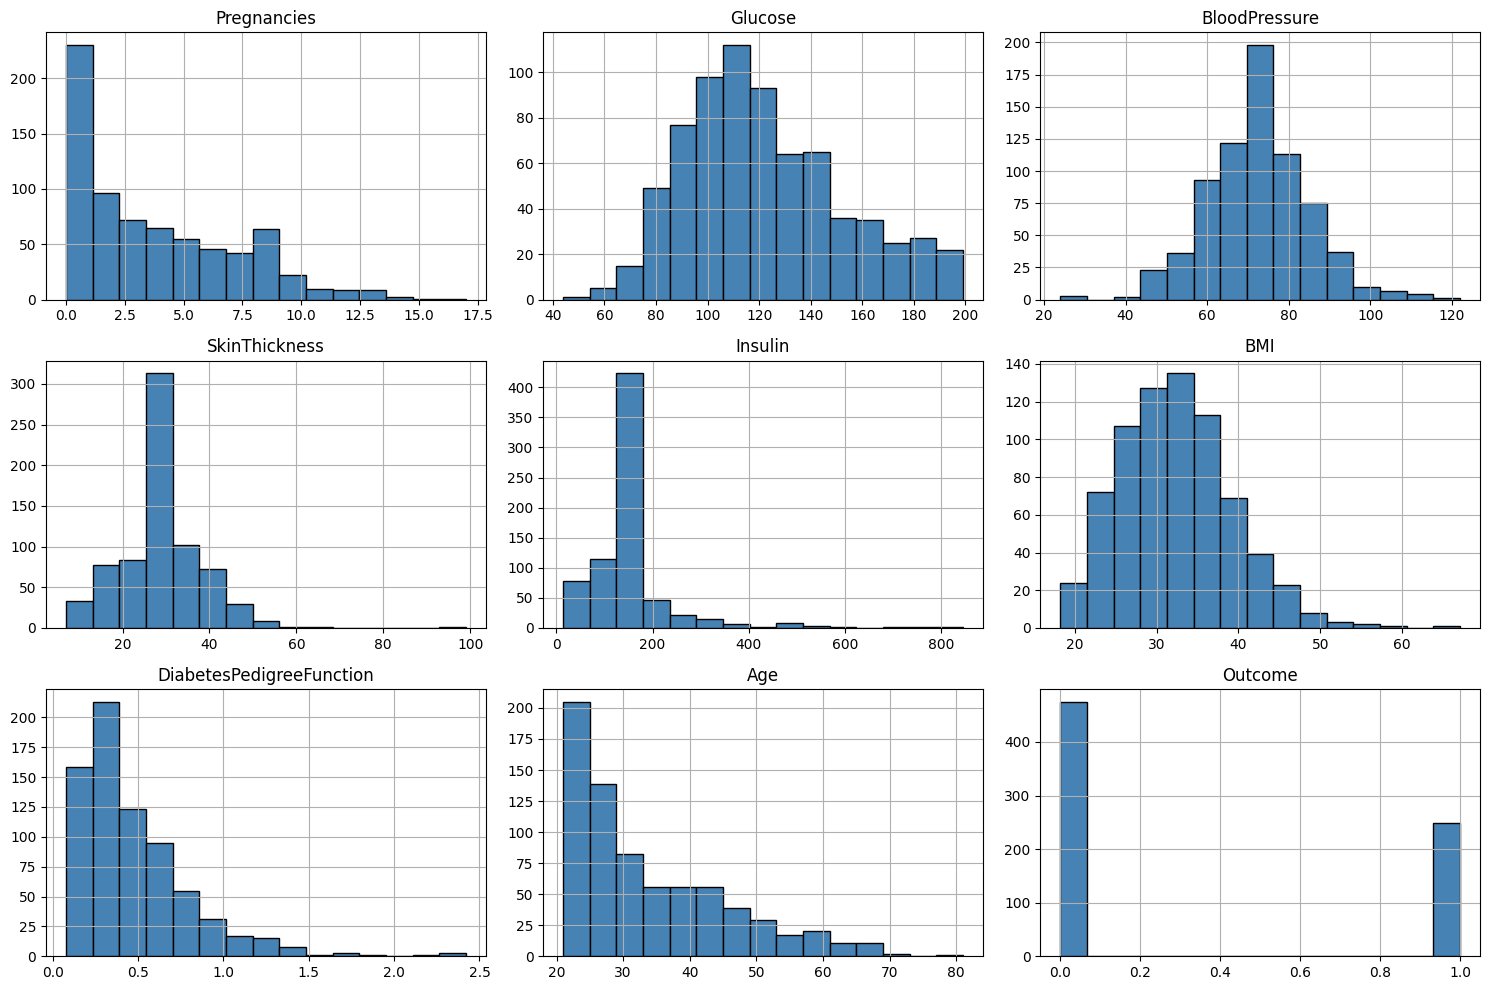

In [8]:
plt.figure(figsize=(12, 10))
dataset.hist(bins=15, figsize=(15, 10), color='steelblue', edgecolor='black')
plt.tight_layout()
plt.show()

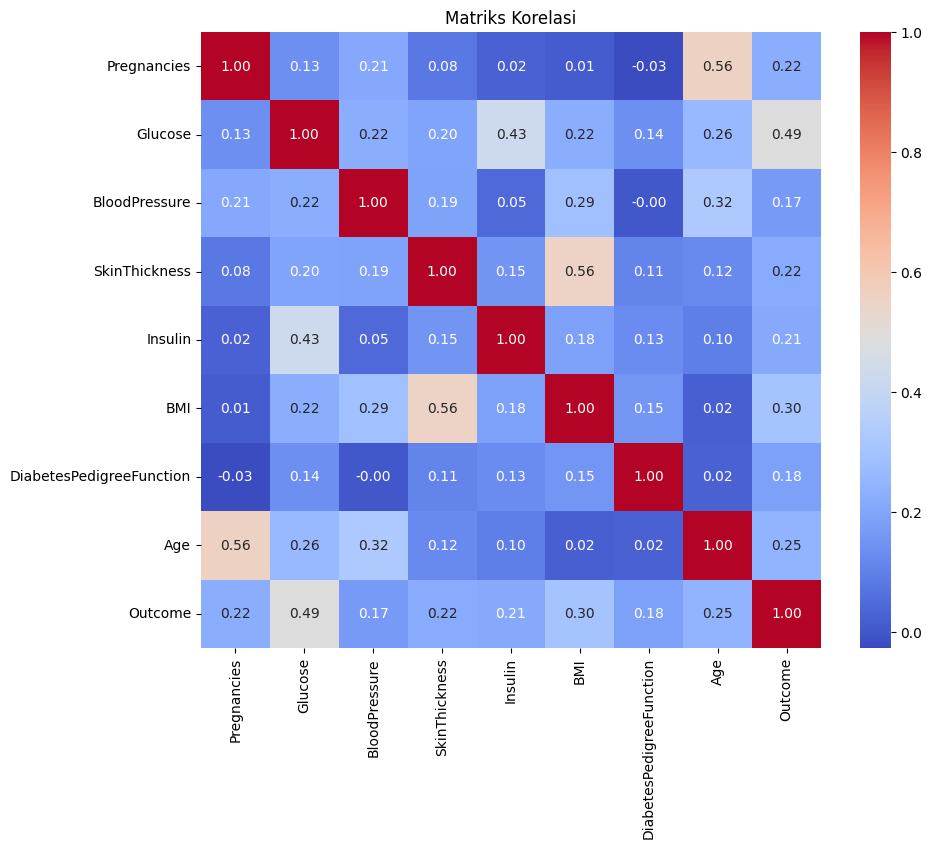

In [9]:
# 2. Korelasi antar fitur
plt.figure(figsize=(10, 8))
sns.heatmap(dataset.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Matriks Korelasi')
plt.show()

/tmp/ipython-input-10-1656138129.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Outcome', data=dataset, palette='Set2')


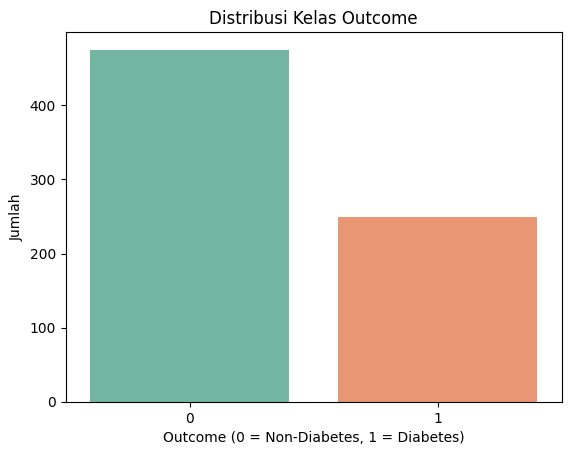

In [10]:
# 3. Distribusi label (Outcome)
sns.countplot(x='Outcome', data=dataset, palette='Set2')
plt.title('Distribusi Kelas Outcome')
plt.xlabel('Outcome (0 = Non-Diabetes, 1 = Diabetes)')
plt.ylabel('Jumlah')
plt.show()

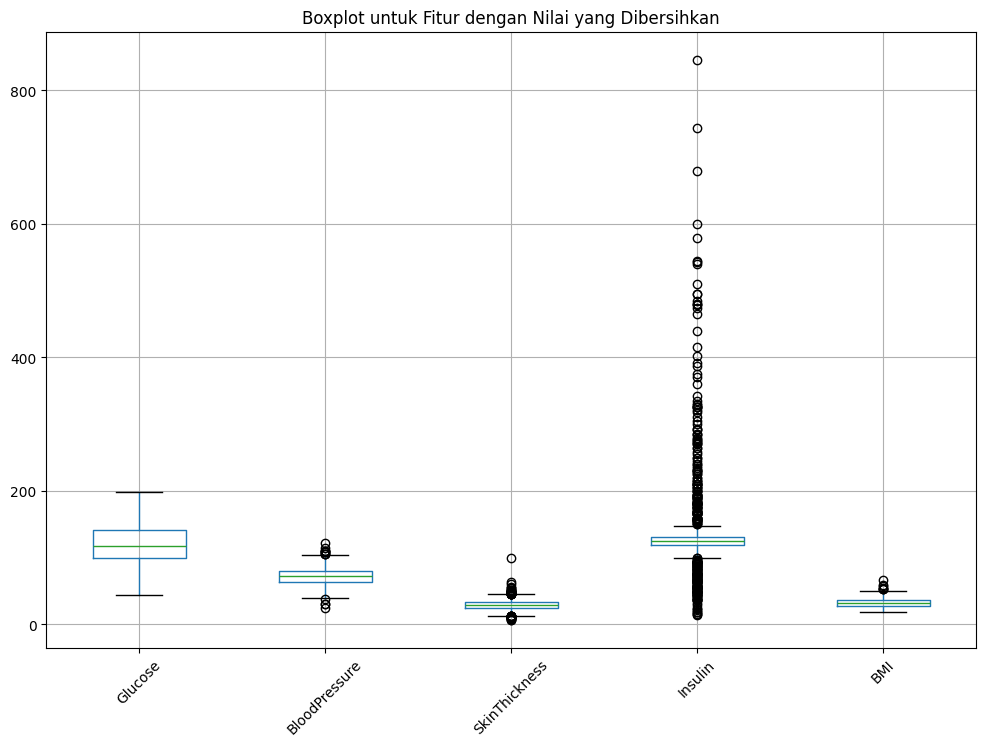

EDA selesai.


In [11]:
# 4. Boxplot untuk mengamati outlier
plt.figure(figsize=(12, 8))
dataset.boxplot(column=zero_cols)
plt.title('Boxplot untuk Fitur dengan Nilai yang Dibersihkan')
plt.xticks(rotation=45)
plt.show()
print("EDA selesai.")

# SELEKSI FITUR


In [12]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import RFE
from sklearn.model_selection import train_test_split

# Memuat dataset
data = pd.read_csv('/content/diabetes.csv')

# Memisahkan data menjadi fitur (X) dan target (y)
X = data.drop(columns=['Outcome'])
y = data['Outcome']

# Untuk menyimpan hasil
results = []

# Coba berbagai nilai random_state
for state in range(1, 101):  # Coba dari 1 hingga 100
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=state)

    estimator = RandomForestClassifier(random_state=42)
    rfe = RFE(estimator=estimator, n_features_to_select=4)
    rfe.fit(X_train, y_train)

    X_train_selected = rfe.transform(X_train)
    X_test_selected = rfe.transform(X_test)

    estimator.fit(X_train_selected, y_train)
    accuracy = estimator.score(X_test_selected, y_test)

    selected_features = X.columns[rfe.support_]
    results.append({
        'state': state,
        'accuracy': accuracy,
        'selected_features': list(selected_features),
        'ranking': rfe.ranking_
    })

# Mencari hasil terbaik
best_result = max(results, key=lambda x: x['accuracy'])

# Menampilkan hasil terbaik
print(f"Random state terbaik: {best_result['state']}")
print(f"Akurasi tertinggi: {best_result['accuracy']:.4f}")
print("Fitur yang terpilih:", best_result['selected_features'])

# Menampilkan peringkat semua fitur
ranking_df = pd.DataFrame({
    'Fitur': X.columns,
    'Peringkat': best_result['ranking']
}).sort_values(by='Peringkat')

print("\nPeringkat Fitur:\n", ranking_df)


Random state terbaik: 26
Akurasi tertinggi: 0.8125
Fitur yang terpilih: ['Glucose', 'BMI', 'DiabetesPedigreeFunction', 'Age']

Peringkat Fitur:
                       Fitur  Peringkat
1                   Glucose          1
7                       Age          1
6  DiabetesPedigreeFunction          1
5                       BMI          1
2             BloodPressure          2
0               Pregnancies          3
4                   Insulin          4
3             SkinThickness          5


# MODELING

## Logistic Regression

In [13]:
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import StandardScaler
import joblib  # Ganti dari pickle ke joblib

# 1. Memuat dataset
data = pd.read_csv('/content/diabetes.csv')

# 2. Memisahkan fitur dan target
X = data.drop(columns=['Outcome'])
y = data['Outcome']

# 3. Membagi data latih dan uji dengan random_state TERBAIK
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=26
)

# 4. Scaling data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# 5. Model Logistic Regression dengan parameter khusus
logreg = LogisticRegression(
    solver='saga',
    penalty='elasticnet',
    l1_ratio=0.5,
    max_iter=2000,
    random_state=42
)
logreg.fit(X_train, y_train)

# 6. Prediksi dan evaluasi
y_pred_logreg = logreg.predict(X_test)

print("\nLogistic Regression (ElasticNet):")
print("Akurasi:", accuracy_score(y_test, y_pred_logreg))
print(classification_report(y_test, y_pred_logreg))

# 7. Menyimpan model dengan joblib
joblib.dump(logreg, 'logistic_regression_model.pkl')

# 8. Menyimpan scaler juga dengan joblib
joblib.dump(scaler, 'scaler.pkl')

print("✅ Model dan Scaler berhasil disimpan menggunakan joblib.")



Logistic Regression (ElasticNet):
Akurasi: 0.8116883116883117
              precision    recall  f1-score   support

           0       0.84      0.89      0.86       103
           1       0.75      0.65      0.69        51

    accuracy                           0.81       154
   macro avg       0.79      0.77      0.78       154
weighted avg       0.81      0.81      0.81       154

✅ Model dan Scaler berhasil disimpan menggunakan joblib.


# METRIX CONFUSION DARI EVALUASI MODEL Logistic Regression


In [14]:
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report

# 1. Muat data
data = pd.read_csv('/content/diabetes.csv')
y = data['Outcome']

# 2. Definisi skenario fitur
features1 = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']
features2 = ['Glucose', 'BMI', 'Age', 'Pregnancies']
features3 = ['Glucose', 'BMI', 'Age', 'Pregnancies', 'DiabetesPedigreeFunction', 'Insulin']

# 3. Fungsi evaluasi model per skenario
def evaluate_scenario(features, scenario_name):
    X = data[features]
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=26)

    scaler = StandardScaler()
    X_train = scaler.fit_transform(X_train)
    X_test = scaler.transform(X_test)

    model = LogisticRegression(random_state=42, max_iter=2000)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    accuracy = accuracy_score(y_test, y_pred) * 100

    print(f"\n🔹 {scenario_name}")
    print(f"Akurasi: {accuracy:.2f}%")
    print(classification_report(y_test, y_pred, target_names=["Non-Diabetes", "Diabetes"]))

# 4. Jalankan ketiga skenario
evaluate_scenario(features1, "Skenario 1: Semua Fitur")
evaluate_scenario(features2, "Skenario 2: 4 Fitur Korelasi Tertinggi")
evaluate_scenario(features3, "Skenario 3: 6 Fitur Korelasi Tertinggi")



🔹 Skenario 1: Semua Fitur
Akurasi: 81.17%
              precision    recall  f1-score   support

Non-Diabetes       0.84      0.89      0.86       103
    Diabetes       0.75      0.65      0.69        51

    accuracy                           0.81       154
   macro avg       0.79      0.77      0.78       154
weighted avg       0.81      0.81      0.81       154


🔹 Skenario 2: 4 Fitur Korelasi Tertinggi
Akurasi: 77.92%
              precision    recall  f1-score   support

Non-Diabetes       0.82      0.86      0.84       103
    Diabetes       0.69      0.61      0.65        51

    accuracy                           0.78       154
   macro avg       0.75      0.74      0.74       154
weighted avg       0.77      0.78      0.78       154


🔹 Skenario 3: 6 Fitur Korelasi Tertinggi
Akurasi: 79.87%
              precision    recall  f1-score   support

Non-Diabetes       0.82      0.89      0.86       103
    Diabetes       0.74      0.61      0.67        51

    accuracy           

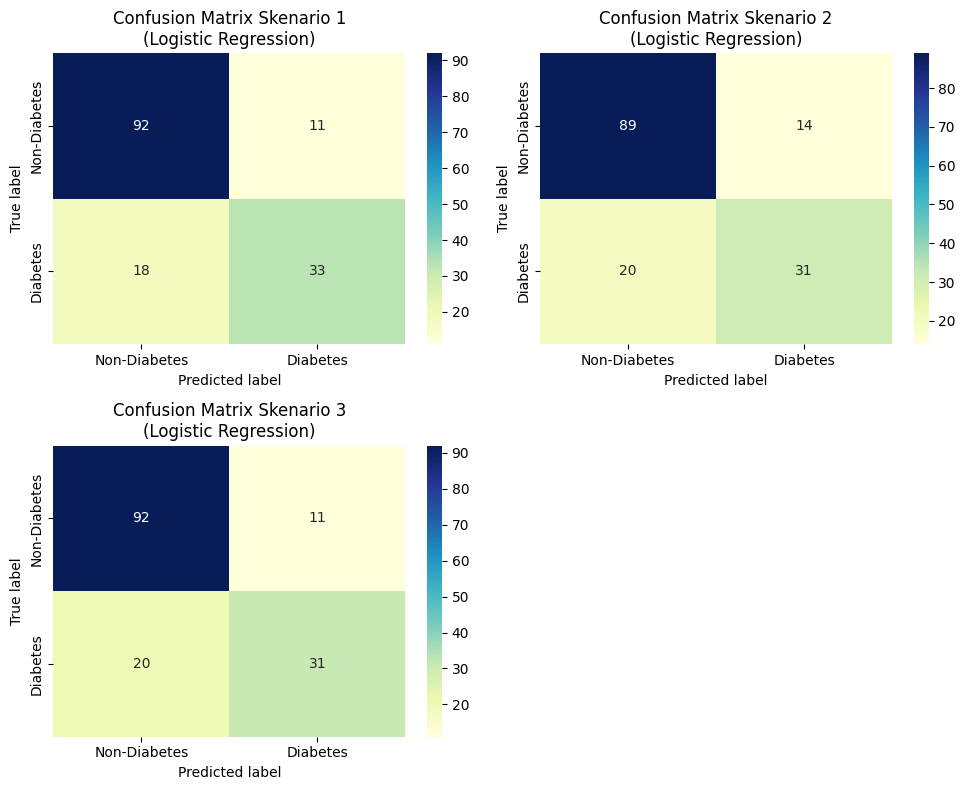

In [15]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix

# 1. Muat data
data = pd.read_csv('/content/diabetes.csv')
y = data['Outcome']

# 2. Daftar skenario
scenarios = {
    "Skenario 1": ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age'],
    "Skenario 2": ['Glucose', 'BMI', 'Age', 'Pregnancies'],
    "Skenario 3": ['Glucose', 'BMI', 'Age', 'Pregnancies', 'DiabetesPedigreeFunction', 'Insulin']
}

# 3. Siapkan plot
fig, axes = plt.subplots(2, 2, figsize=(10, 8))
axes = axes.flatten()

# 4. Loop skenario
for i, (scenario_name, features) in enumerate(scenarios.items()):
    X = data[features]
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=26)

    scaler = StandardScaler()
    X_train = scaler.fit_transform(X_train)
    X_test = scaler.transform(X_test)

    model = LogisticRegression(max_iter=2000, random_state=42)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    cm = confusion_matrix(y_test, y_pred)

    sns.heatmap(cm, annot=True, fmt='d', cmap='YlGnBu', cbar=True,
                xticklabels=["Non-Diabetes", "Diabetes"],
                yticklabels=["Non-Diabetes", "Diabetes"],
                ax=axes[i])

    axes[i].set_title(f"Confusion Matrix {scenario_name}\n(Logistic Regression)")
    axes[i].set_xlabel("Predicted label")
    axes[i].set_ylabel("True label")

# 5. Hapus subplot kosong jika jumlah skenario < 4
if len(scenarios) < 4:
    fig.delaxes(axes[-1])  # Hapus slot kosong terakhir

plt.tight_layout()
plt.show()


In [16]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
import pandas as pd

data = pd.read_csv('/content/diabetes.csv')
X = data.drop(columns=['Outcome'])
y = data['Outcome']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=26)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

model = LogisticRegression(random_state=42, max_iter=1000)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred) * 100

print(f"\nHasil Skenario 1 (Semua Fitur):")
print(f"Akurasi: {accuracy:.1f}%")
print("Catatan: Untuk mendapatkan hasil terbaik, coba random_state=26 di train_test_split()")



Hasil Skenario 1 (Semua Fitur):
Akurasi: 81.2%
Catatan: Untuk mendapatkan hasil terbaik, coba random_state=26 di train_test_split()


  COBA PAKE ALGORITMA LAIN (RME) DAN BISA DI TUNNING GA ALHGORITMA NYA LOGISTIC REGRESSION
